In [10]:
from loren_frank_data_processing import (make_epochs_dataframe,
                                         make_neuron_dataframe)
from src.parameters import (ANIMALS, MIN_N_NEURONS, _BRAIN_AREAS)

from tqdm.auto import tqdm
import os
import pickle
import pandas as pd
import numpy as np

In [2]:
epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)

neuron_info = neuron_info.loc[
(neuron_info.type == 'principal') &
(neuron_info.numspikes > 100) &
neuron_info.area.isin(_BRAIN_AREAS)]

n_neurons = (neuron_info
                .groupby(['animal', 'day', 'epoch'])
                .neuron_id
                .agg(len)
                .rename('n_neurons')
                .to_frame())

epoch_info = epoch_info.join(n_neurons)
is_w_track = (epoch_info.environment
                .isin(['TrackA', 'TrackB', 'WTrackA', 'WTrackB']))
is_animal = epoch_info.index.isin(['bon', 'fra', 'gov', 'dud', 'con', 'Cor', 'dav', 'egy', 'cha'], level='animal')

valid_epochs = (is_w_track &
                (epoch_info.n_neurons > MIN_N_NEURONS) &
                is_animal
                )

In [5]:
DATA_DIR = '/home/zilong/Desktop/replay_trajectory_paper/Processed-Data'

#initial a panda dataframe to store the number of SWRs in each epoch
nSWRs = pd.DataFrame(columns=['animal', 'day', 'epoch', 'median'])

for epoch_key in tqdm(epoch_info[valid_epochs].index, desc='epochs'):
    animal, day, epoch = epoch_key
    print(f'{animal}, {day}, {epoch}')
    
    #load the dictionary from the 'ReplayTrajectories' folder under PROCESSED_DATA_DIR using pickle
    with open(os.path.join(DATA_DIR, 'ReplayTrajectories', f'{animal}_{day:02d}_{epoch:02d}_traj.pkl'), 'rb') as f:
        Replay_traj = pickle.load(f)
        
    #get number of SWRs
    n_swr = len(Replay_traj.keys())
    
    #add the number of SWRs to the panda dataframe
    nSWRs = nSWRs.append({'animal': animal, 'day': day, 'epoch': epoch, 'nswr': n_swr}, ignore_index=True)
    
#save the panda dataframe to a panda series
nSWRs_series = nSWRs.set_index(['animal', 'day', 'epoch']).nswr     

epochs:   0%|          | 0/140 [00:00<?, ?it/s]

Cor, 1, 2
Cor, 1, 4
Cor, 2, 2
Cor, 2, 4
Cor, 3, 2
Cor, 3, 4
Cor, 4, 2
Cor, 4, 4
Cor, 7, 2
Cor, 8, 2
bon, 3, 2
bon, 3, 4
bon, 3, 6
bon, 4, 2
bon, 4, 4
bon, 4, 6
bon, 5, 2
bon, 5, 4
bon, 5, 6
bon, 6, 2
bon, 6, 4
bon, 6, 6
bon, 7, 2
bon, 7, 4
bon, 7, 6
bon, 8, 2
bon, 8, 4
bon, 8, 6
bon, 9, 2
bon, 9, 4
bon, 9, 6
bon, 10, 2
bon, 10, 4
bon, 10, 6
cha, 4, 2
cha, 4, 4
cha, 8, 2
cha, 8, 4
con, 1, 2
con, 1, 4
con, 2, 2
con, 2, 4
con, 3, 2
con, 3, 4
con, 4, 2
con, 4, 4
con, 4, 6
con, 5, 2
con, 5, 4
con, 5, 6
con, 6, 2
con, 6, 4
con, 6, 6
dav, 3, 2
dav, 3, 4
dav, 3, 6
dav, 4, 2
dav, 4, 4
dav, 4, 6
dav, 5, 3
dav, 6, 2
dav, 6, 4
dav, 6, 6
dav, 7, 2
dav, 7, 3
dav, 7, 5
dav, 7, 7
dav, 7, 9
dud, 2, 2
dud, 5, 2
egy, 5, 2
egy, 5, 4
egy, 5, 6
egy, 6, 4
egy, 6, 7
egy, 7, 2
egy, 7, 4
egy, 7, 6
egy, 8, 2
egy, 8, 4
egy, 8, 6
egy, 9, 2
egy, 9, 4
egy, 10, 2
egy, 10, 4
egy, 10, 6
egy, 11, 2
egy, 11, 4
egy, 11, 6
fra, 4, 2
fra, 4, 4
fra, 4, 6
fra, 5, 2
fra, 5, 4
fra, 5, 6
fra, 6, 2
fra, 6, 4
fra, 6, 6
fra, 7, 2
f

In [7]:
#get the mean and std of the number of SWRs in nSWRs_series
mean = nSWRs_series.mean()
std = nSWRs_series.std()

#print the mean and std
print(f'Mean number of SWRs: {mean}')
print(f'Std of number of SWRs: {std}')

Mean number of SWRs: 172.7642857142857
Std of number of SWRs: 62.39680524867857


(array([ 3.,  2.,  2.,  8.,  2., 17.,  8.,  9.,  9., 13., 11.,  9.,  5.,
        11.,  9., 14.,  1.,  2.,  2.,  3.]),
 array([ 36.  ,  49.85,  63.7 ,  77.55,  91.4 , 105.25, 119.1 , 132.95,
        146.8 , 160.65, 174.5 , 188.35, 202.2 , 216.05, 229.9 , 243.75,
        257.6 , 271.45, 285.3 , 299.15, 313.  ]),
 <BarContainer object of 20 artists>)

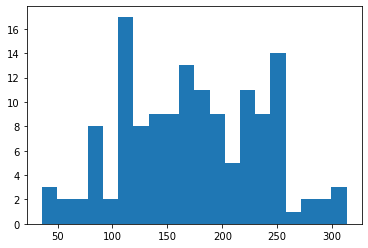

In [14]:
import matplotlib.pyplot as plt
#plot the histogram of the number of SWRs
plt.hist(nSWRs_series, bins=20)